In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics


In [18]:
fraud=pd.read_csv("C:\\Users\\hp\\Downloads\\Fraud_check.csv")

In [19]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [20]:
fraud["income"]="<=30000"
fraud.loc[fraud["Taxable.Income"]>=30000,"income"]="Good"
fraud.loc[fraud["Taxable.Income"]<=30000,"income"]="Risky"


In [27]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
 6   income           600 non-null    object
dtypes: int64(3), object(4)
memory usage: 32.9+ KB


In [21]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,income
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [28]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [24]:
fraud1=pd.get_dummies(fraud,columns=['Undergrad','Marital.Status','Urban','income'])

In [25]:
fraud1.columns

Index(['Taxable.Income', 'City.Population', 'Work.Experience', 'Undergrad_NO',
       'Undergrad_YES', 'Marital.Status_Divorced', 'Marital.Status_Married',
       'Marital.Status_Single', 'Urban_NO', 'Urban_YES', 'income_Good',
       'income_Risky'],
      dtype='object')

In [ ]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [33]:
df_norm = norm_func(fraud.iloc[:,1:])
df_norm.tail(10)

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,income
590,0.5,0.368405,0.341473,0.466667,1.0,0.0
591,1.0,0.194061,0.615406,0.600000,1.0,1.0
592,1.0,0.648869,0.283703,0.533333,0.0,0.0
593,0.0,0.834360,0.610256,0.333333,1.0,0.0
594,0.5,0.416901,0.412341,0.300000,1.0,0.0
595,0.0,0.740236,0.078811,0.233333,1.0,0.0
596,0.0,0.669122,0.170058,0.066667,1.0,0.0
597,0.0,0.416566,0.737240,0.000000,1.0,0.0
598,0.5,0.988540,0.886810,0.566667,0.0,0.0
599,0.0,0.965408,0.760683,0.533333,0.0,0.0


In [38]:
x = df_norm.drop(['income'], axis=1)
y = df_norm['income']

In [47]:
x

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,1.0,0.656468,0.139472,0.333333,1.0
1,0.0,0.264428,0.622394,0.600000,1.0
2,0.5,0.300415,0.772568,1.000000,1.0
3,1.0,0.448436,0.962563,0.500000,1.0
4,0.5,0.792258,0.010081,0.933333,0.0
...,...,...,...,...,...
595,0.0,0.740236,0.078811,0.233333,1.0
596,0.0,0.669122,0.170058,0.066667,1.0
597,0.0,0.416566,0.737240,0.000000,1.0
598,0.5,0.988540,0.886810,0.566667,0.0


In [44]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [45]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

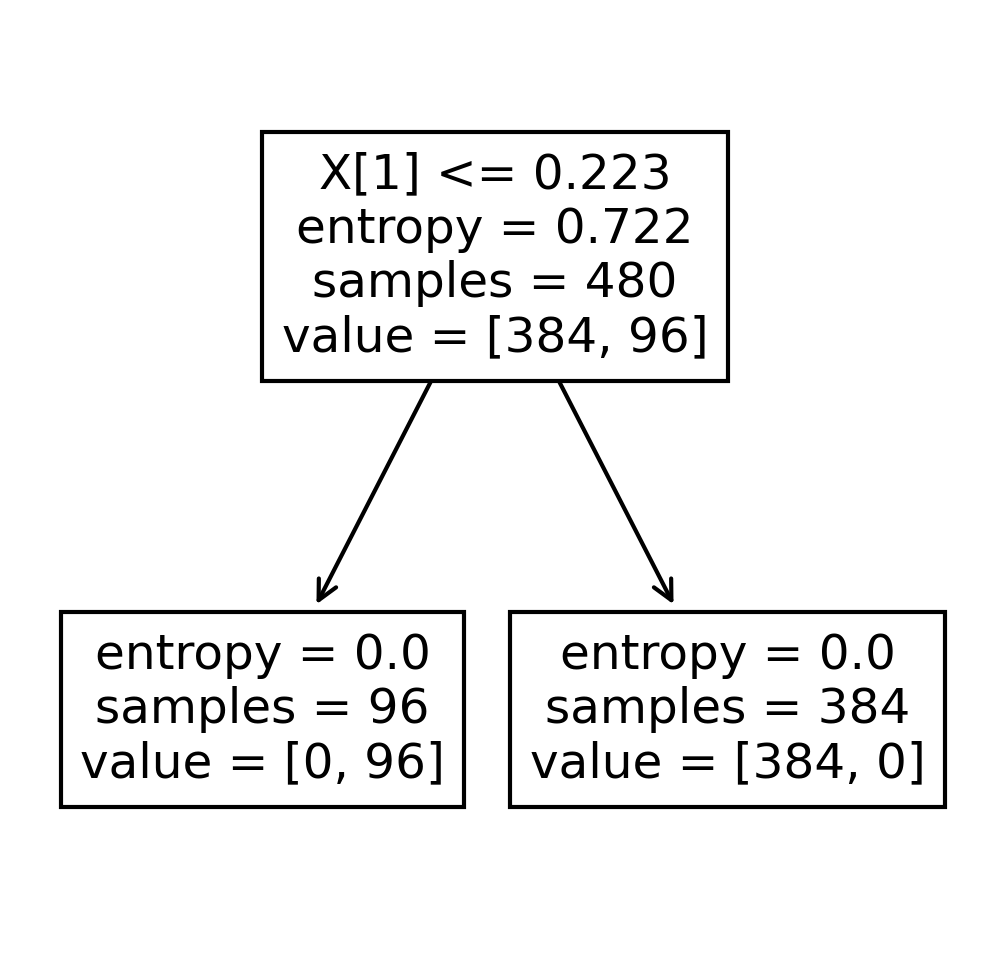

In [46]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
#PLot the decision tree
tree.plot_tree(model);

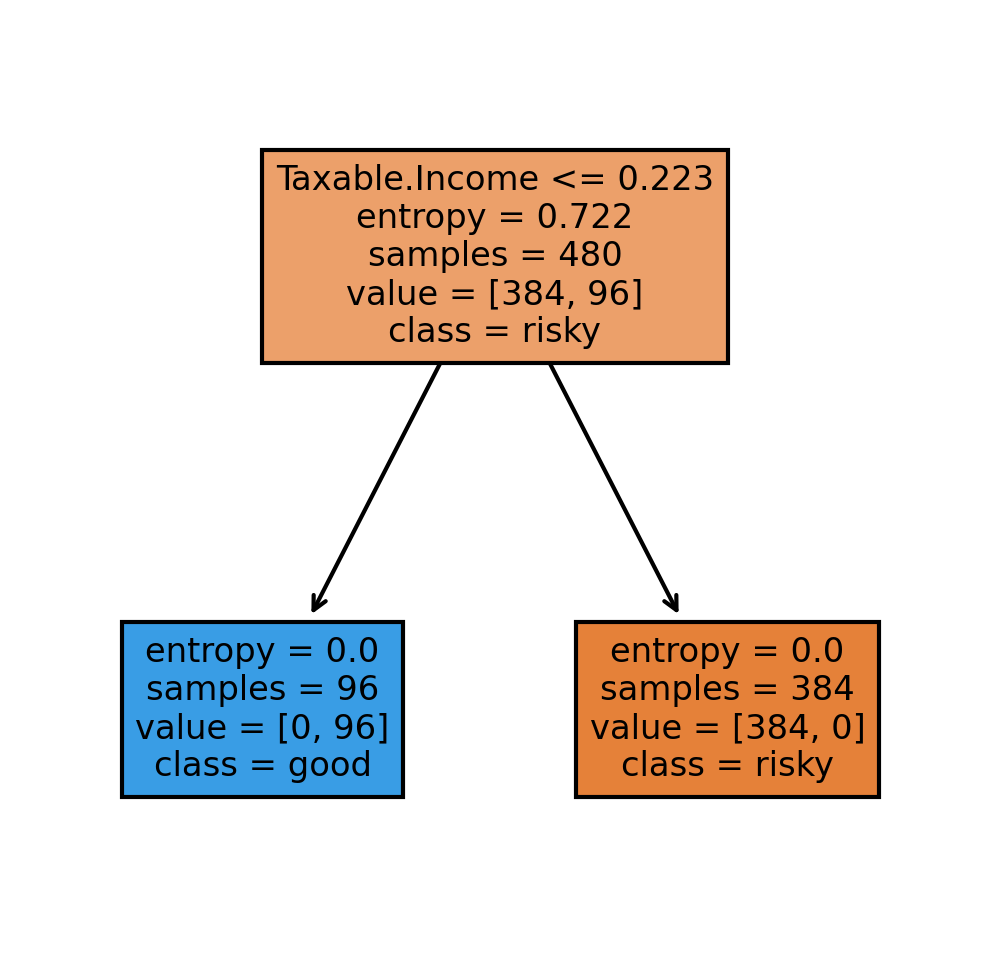

In [49]:
fn=['Marital.Status	','Taxable.Income','City.Population','Work.Experience','Urban']
cn=['risky','good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)    #dpi= dots per inch
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [50]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0.0    92
1.0    28
dtype: int64

In [51]:
preds

array([0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0.])

In [52]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0.0,1.0
income,,
0.0,92,0
1.0,0,28


In [53]:
# Accuracy 
np.mean(preds==y_test)

1.0

In [58]:
y_pred = model.predict(x_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0
